In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [4]:
# Read with pandas
mouse_drug_data_to_load_pd = pd.read_csv(mouse_drug_data_to_load, encoding="iso-8859-1", low_memory=False)
mouse_drug_data_to_load_pd.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Read with pandas
clinical_trial_data_to_load_pd = pd.read_csv(clinical_trial_data_to_load, encoding="iso-8859-1", low_memory=False)
clinical_trial_data_to_load_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
merge_table = pd.merge(clinical_trial_data_to_load_pd, mouse_drug_data_to_load_pd, on="Mouse ID", how="outer")
merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



## Tumor Response to Treatment

In [8]:
selected_tumor_response_data_df = merge_table.loc[:,["Drug","Timepoint","Tumor Volume (mm3)"]]
selected_tumor_response_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [9]:
tumor_resp_mean_data = selected_tumor_response_data_df.groupby(['Drug','Timepoint']).mean()["Tumor Volume (mm3)"]
#grouped_data_df

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
tumor_resp_mean_data.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [12]:
reset_tumor_resp_mean_data = tumor_resp_mean_data.reset_index()

In [13]:
reset_tumor_resp_mean_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [14]:
trm=pd.DataFrame(pd.DataFrame.pivot(reset_tumor_resp_mean_data,index ='Timepoint',columns ='Drug',values="Tumor Volume (mm3)"))
trm.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [15]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [16]:
tumor_response_sem_data  = selected_tumor_response_data_df.groupby(['Drug','Timepoint']).sem()["Tumor Volume (mm3)"]

In [17]:
reset_tumor_response_sem = tumor_response_sem_data.reset_index()

In [18]:
reset_tumor_response_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [19]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [20]:
trs =pd.DataFrame(pd.DataFrame.pivot(reset_tumor_response_sem,index ='Timepoint',columns ='Drug',values="Tumor Volume (mm3)"))
trs.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [21]:

# Generate the Plot (with Error Bars)

# Save the Figure



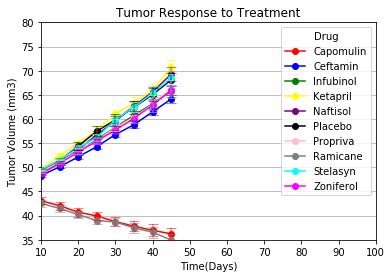

In [22]:
# Plot sample means with error bars
labels = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
colors = ['red','blue','green','yellow','purple','black','pink','grey','cyan','magenta']
df = trm
df_yerr = trs

fig, ax = plt.subplots()
df.plot(ax=ax, marker="o",color=colors)

index = df.index
rows = len(index)
columns = len(df.columns)

#factor = 0.95
for column,color in zip(range(columns),colors):
    y = df.values[:,column]
    yerr = df_yerr.values[:,column]
    ax.errorbar(df.index, y, yerr=yerr, markersize=0,fmt="o", alpha=0.5,capsize=5,color=color,zorder = 10,)
    #ax.errorbar(df.index*factor, y, yerr=yerr, fmt="o", capsize=5,color=color,zorder = 10,)
    #factor *= 1.02
 
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(10, 100)
ax.set_ylim(35, 80)
ax.set_title('Tumor Response to Treatment')
ax.yaxis.grid(True)

In [23]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [24]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [25]:
selected_metastatic_response_data_df = merge_table.loc[:,["Drug","Timepoint","Metastatic Sites"]]
#selected_metastatic_response_data_df.head()

In [26]:
metastatic_response_data_df = selected_metastatic_response_data_df.groupby(['Drug','Timepoint']).mean()["Metastatic Sites"]

In [27]:
reset_metastatic_response_mean_data = metastatic_response_data_df.reset_index()

In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [29]:
metastatic_response_sem_data  = selected_metastatic_response_data_df.groupby(['Drug','Timepoint']).sem()["Metastatic Sites"]
reset_metastatic_response_sem_data = metastatic_response_sem_data.reset_index()

In [30]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [31]:
trm_mr=pd.DataFrame(pd.DataFrame.pivot(reset_metastatic_response_mean_data,index ='Timepoint',columns ='Drug',values="Metastatic Sites"))
trm_mr.head()
trs_mr=pd.DataFrame(pd.DataFrame.pivot(reset_metastatic_response_sem_data,index ='Timepoint',columns ='Drug',values="Metastatic Sites"))
trs_mr.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [32]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


Text(0.5, 1.0, 'Metastatic Spread During Treatment')

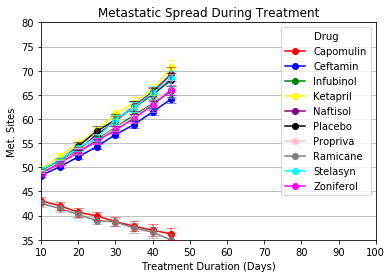

In [33]:
# Plot sample means with error bars
labels = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
colors = ['red','blue','green','yellow','purple','black','pink','grey','cyan','magenta']
df = trm
df_yerr = trs

fig, ax = plt.subplots()
df.plot(ax=ax, marker="o",color=colors)

index = df.index
rows = len(index)
columns = len(df.columns)

#factor = 0.95
for column,color in zip(range(columns),colors):
    y = df.values[:,column]
    yerr = df_yerr.values[:,column]
    ax.errorbar(df.index, y, yerr=yerr, markersize=0,fmt="o", alpha=0.5,capsize=5,color=color,zorder = 10,)
    #ax.errorbar(df.index*factor, y, yerr=yerr, fmt="o", capsize=5,color=color,zorder = 10,)
    #factor *= 1.02
 

ax.set_xlim(10, 100)
ax.set_ylim(35, 80)
ax.yaxis.grid(True)
#ax.set_xscale("log")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title('Metastatic Spread During Treatment')


In [34]:
# Show the Figure
plt.show()

## Survival Rates

In [35]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [36]:
mouse_data_df = merge_table.loc[:,["Drug","Timepoint","Mouse ID"]]
count_of_mice_data_df = mouse_data_df.groupby(['Drug','Timepoint']).count()["Mouse ID"]
reset_count_of_mice_data_df = count_of_mice_data_df.reset_index()
reset_count_of_mice_data_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [37]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [38]:
trm_mouse=pd.DataFrame(pd.DataFrame.pivot(reset_count_of_mice_data_df,index ='Timepoint',columns ='Drug',values="Mouse ID"))
trm_mouse.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


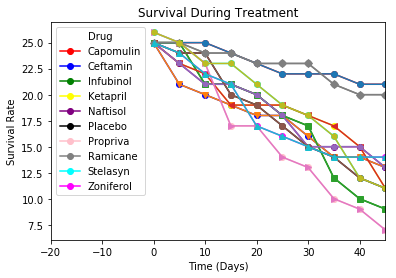

In [50]:
# Plot sample means with error bars
#labels = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
labels = trm_mouse.columns
colors = ['red','blue','green','yellow','purple','black','pink','grey','cyan','magenta']
markers= ["o","v","s","<","p","8",">","D","h","^"]
df = trm_mouse
markerreference=0


fig, ax = plt.subplots()
df.plot(ax=ax, marker="o",color=colors)

for x in labels:
    plt.errorbar(trm_mouse.index,trm_mouse[x], marker = markers[markerreference])
    markerreference = markerreference+1
 

ax.set_xlim(left = -20)
#ax.set_ylim(40, 100)
#ax.yaxis.grid(True)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate")
ax.set_title('Survival During Treatment')
plt.show()


In [40]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [41]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [42]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

In [43]:
trm

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [44]:
origin_val = trm.loc[0,:]
last_val = trm.loc[45,:]
Percentage_change = ((last_val-origin_val)/origin_val)*100
Percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [45]:
drug_effect = tuple(Percentage_change)

In [46]:
drug_effect_df = list(Percentage_change)

In [47]:
def setcolor(elem):
    if elem < 0:
        bar_color = 'Green'
    else:
        bar_color = 'Red'
    return bar_color      
#print(set_color(-1))

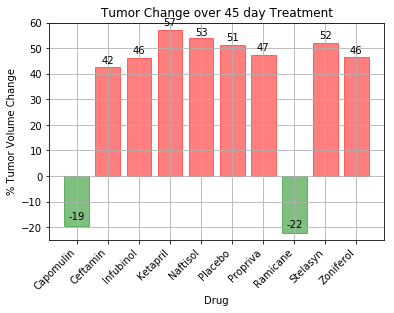

In [48]:
x_axis = np.arange(len(drug_effect_df))
barlist=plt.bar(x_axis, drug_effect_df, alpha=0.5, align="center")
i = 0
for value in (drug_effect_df):
    #print(value)
    bar_colors = setcolor(value)
    #print(bar_colors)
    barlist[i].set_color(bar_colors)
    height = (barlist[i].get_height().astype(int))
    plt.annotate('{}'.format(height),
                    xy=(barlist[i].get_x() + barlist[i].get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    i = i+1
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'],rotation = 45, ha="right")
plt.ylim(-25, 60)
# Give our chart some labels and a tile
plt.title("Tumor Change over 45 day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid(True)

    
plt.show()